# Messing Around with Surprise

In [1]:
#Package Importing
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, accuracy
from surprise.prediction_algorithms import KNNWithMeans
from surprise.model_selection import cross_validate, KFold

In [2]:
#Importing movielens-100k dataset
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to C:\Users\joseph.berkowitz/.surprise_data/ml-100k


In [5]:
data = Dataset.load_builtin('ml-100k')

In [13]:
#Checking ratings data format
data.raw_ratings[0:5]

[('196', '242', 3.0, '881250949'),
 ('186', '302', 3.0, '891717742'),
 ('22', '377', 1.0, '878887116'),
 ('244', '51', 2.0, '880606923'),
 ('166', '346', 1.0, '886397596')]

In [15]:
#Instantiating the user-based algorithm
#Similarity metric - pearson
sim_options = {"name": "pearson",
               "user_based": True}

algo = KNNWithMeans(sim_options=sim_options, verbose=True)

#5-Fold Cross Validation for User-Based
cross_validate(algo, data, measures=["MAE", "RMSE"], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating MAE, RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
MAE (testset)     0.7437  0.7386  0.7420  0.7488  0.7420  0.7430  0.0033  
RMSE (testset)    0.9512  0.9439  0.9467  0.9545  0.9469  0.9486  0.0037  
Fit time          2.79    3.44    4.86    4.39    4.09    3.91    0.72    
Test time         4.90    7.00    6.56    6.60    5.10    6.03    0.86    


{'test_mae': array([0.74368062, 0.73862789, 0.74201405, 0.74882126, 0.74202511]),
 'test_rmse': array([0.95118758, 0.94394191, 0.94669571, 0.95448285, 0.9468625 ]),
 'fit_time': (2.7939820289611816,
  3.441420316696167,
  4.859930038452148,
  4.387575626373291,
  4.085370779037476),
 'test_time': (4.902202367782593,
  6.9974424839019775,
  6.563614130020142,
  6.596137523651123,
  5.097605466842651)}

In [16]:
#Just Pulling RMSE from cross validation results
results = cross_validate(algo, data, measures=["RMSE"], cv=5, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9517  0.9450  0.9481  0.9491  0.9528  0.9493  0.0028  
Fit time          2.83    8.58    2.82    2.70    4.64    4.31    2.25    
Test time         6.31    6.33    5.17    5.23    9.77    6.56    1.68    


In [21]:
user_based_rmse = results['test_rmse']

In [22]:
#Instantiating the item-based algorithm
#Similarity metric - cosine
sim_options = {"name":"cosine",
               "user_based":False}

algo = KNNWithMeans(sim_options=sim_options, verbose=True)

#5-fold cross validation for item-based
results = cross_validate(algo, data, measures=["RMSE"], cv=5, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9430  0.9445  0.9501  0.9355  0.9386  0.9423  0.0050  
Fit time          3.90    5.77    10.26   4.35    5.51    5.96    2.26    
Test time         6.82    6.30    12.50   6.60    6.42    7.73    2.39    


In [23]:
item_based_rmse = results["test_rmse"]
item_based_rmse

array([0.94300046, 0.94448751, 0.95012937, 0.93552729, 0.93857873])

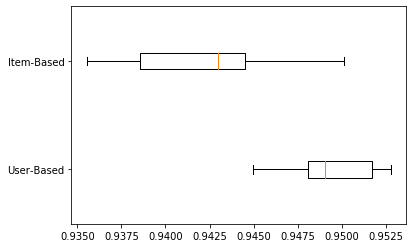

In [29]:
plt.boxplot([user_based_rmse, item_based_rmse], vert=False, labels=["User-Based", "Item-Based"])
plt.show()

In [31]:
#KFold Cross Validation
#Instantiating the user-based algorithm
#Similarity metric - pearson
data = Dataset.load_builtin('ml-100k')

sim_options = {"name": "pearson",
               "user_based": True}

algo = KNNWithMeans(sim_options=sim_options)

kf = KFold(n_splits=5, random_state=33)

user_based_results = []

for trainset, testset in kf.split(data):
    
    #train and test algorithm
    algo.fit(trainset)
    predictions = algo.test(testset)
    
    #compute and print RMSE
    user_based_results.append(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9541
RMSE: 0.9541
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9568
RMSE: 0.9568
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9455
RMSE: 0.9455
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9461
RMSE: 0.9461
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9452
RMSE: 0.9452


In [32]:
user_based_results

[0.9540962507997115,
 0.9567602058635479,
 0.9454972532434166,
 0.9460664270754,
 0.945218120893166]

In [33]:
#KFold Cross Validation
#Instantiating the user-based algorithm
#Similarity metric - pearson
data = Dataset.load_builtin('ml-100k')

sim_options = {"name": "cosine",
               "user_based": False}

algo = KNNWithMeans(sim_options=sim_options)

kf = KFold(n_splits=5, random_state=33)

item_based_results = []

for trainset, testset in kf.split(data):
    
    #train and test algorithm
    algo.fit(trainset)
    predictions = algo.test(testset)
    
    #compute and print RMSE
    item_based_results.append(accuracy.rmse(predictions))

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9510
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9481
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9384
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9352
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9412


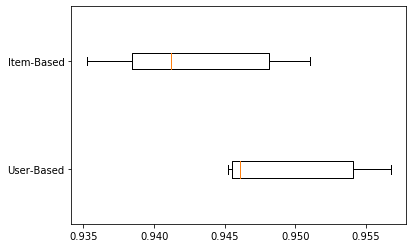

In [34]:
plt.boxplot([user_based_results, item_based_results], vert=False, labels=["User-Based", "Item-Based"])
plt.show()

In [36]:
from scipy import stats
stats.ttest_rel(user_based_results, item_based_results)

Ttest_relResult(statistic=4.669784527902444, pvalue=0.00951984514653629)